# TITILL
**02806 Social Data Visualization**

**Group numher:** 36

**Group members:** 
- Birkir Fanndal Sturluson s232729 
- Brynjar Karl Ævarsson s232736 
- Védís Sigríður Ingvarsdóttir s232719 

___

# Table of Contents
* [Motivation](#motivation)

* [Basic stats](#basic)
    * [Data cleaning](#cleaning)

* [Data analysis](#data_analysis)
    * [Data info](#data_info)

* [Genre](#genre)

* [Visualizations](#visualizations)
    * [Stadiums](#stadiums)
    * [Teams](#teams)

* [Discussion](#discuss)
* [Contributions](#contribute)




___

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-bright')
import calplot
import folium
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.palettes import Category20
from bokeh.io import reset_output

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.layouts import column
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis256
from bokeh.transform import Dodge  
from bokeh.plotting import reset_output
from bokeh.palettes import Category20
from bokeh.palettes import Category20
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange, CDSView, BooleanFilter
from bokeh.models import FactorRange
from bokeh.models import Legend
from bokeh.models import ColumnDataSource, HoverTool

from sklearn.linear_model import LinearRegression


<a id="motivation"></a> <br>
# Motivation

In [67]:
# Coordinates for NFL teams
stadium_coordinates = pd.read_csv("DatasetNew/NFL_stadium_coordinates.csv")

# Attendance at each game from 2000 to 2019
game_attendance = pd.read_csv("DatasetNew/NFL_Attendance_2000_2019.csv")

# Information about each game from 1999 to 2023
games = pd.read_csv("DatasetNew/games.csv")

<a id="basic"></a> <br>
# Basic stats

<a id="cleaning"></a> <br>
### Data cleaning

Firstly, we want to define the team abbrivations and connect them to the right team name

In [68]:
team_abbr = {
    'Cardinals': 'ARI',
    'Falcons': 'ATL',
    'Ravens': 'BAL',
    'Bills': 'BUF',
    'Panthers': 'CAR',
    'Bears': 'CHI',
    'Bengals': 'CIN',
    'Browns': 'CLE',
    'Cowboys': 'DAL',
    'Broncos': 'DEN',
    'Lions': 'DET',
    'Packers': 'GB',
    'Texans': 'HOU',
    'Colts': 'IND',
    'Jaguars': 'JAX',
    'Chiefs': 'KC',
    'Raiders': 'OAK',
    'Chargers': 'LAC',
    'Rams': 'LA',
    'Dolphins': 'MIA',
    'Vikings': 'MIN',
    'Patriots': 'NE',
    'Saints': 'NO',
    'Giants': 'NYG',
    'Jets': 'NYJ',
    'Eagles': 'PHI',
    'Steelers': 'PIT',
    '49ers': 'SF',
    'Seahawks': 'SEA',
    'Buccaneers': 'TB',
    'Titans': 'TEN',
    'Redskins': 'WAS'
}

# Extract the last name from team names
game_attendance['last_name'] = game_attendance['team_name'].apply(lambda x: x.split()[-1])

# Map team names to abbreviations
team_abbr_map = {team: team_abbr[team] for team in game_attendance['last_name'].unique()}

# Create a new column with abbreviations
game_attendance['team_abbr'] = game_attendance['last_name'].map(team_abbr_map)


In [69]:
stadium_coordinates["Team"] = stadium_coordinates["Team"].replace('Forty-Niners', '49ers')

stadium_coordinates['team_abbr'] = stadium_coordinates['Team'].map(team_abbr)

games["gameday"] = pd.to_datetime(games['gameday'])
games['year'] = games['gameday'].dt.year


# Filter games for the years 2000 to 2019
game_score_filtered = games[(games['year'] >= 2000) & (games['year'] <= 2019)]

# Filter game_attendance for the years 2000 to 2019
team_data_filtered = game_attendance[(game_attendance['year'] >= 2000) & (game_attendance['year'] <= 2019)]

# Convert 'week' column to int type for consistency
game_score_filtered['week'] = game_score_filtered['week'].astype(int)

# Merge the filtered datasets on team abbreviation, week, and year
merged_data = pd.merge(game_score_filtered, team_data_filtered, left_on=['home_team', 'week', 'year'], right_on=['team_abbr', 'week', 'year'], how='inner')

# Merge the stadium coordinates
final_data = pd.merge(merged_data, stadium_coordinates, left_on=['team_abbr'], right_on=["team_abbr"], how='inner')

/var/folders/9w/dgxmbyyn2hl1p64rjgpmgw880000gn/T/ipykernel_48072/2967030541.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
result = final_data[["game_id","season","week","gameday","weekday","wind","temp","home_team","away_team","home_score","away_score","stadium", "team","team_name","weekly_attendance","last_name","team_abbr","Team","longitude","latitude"]]

In [71]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Create a new column 'home_team_win'
result['home_team_win'] = result['home_team'] == result['winning_team']

/var/folders/9w/dgxmbyyn2hl1p64rjgpmgw880000gn/T/ipykernel_48072/3983529507.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9w/dgxmbyyn2hl1p64rjgpmgw880000gn/T/ipykernel_48072/3983529507.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
# Convert 'season' column to datetime format
result['season'] = pd.to_datetime(result['season'], format='%Y')
# Extract the year component
result['season'] = result['season'].dt.year

# Filter out rows where 'season' column equals 1999
result = result[result['season'] != 1999]

/var/folders/9w/dgxmbyyn2hl1p64rjgpmgw880000gn/T/ipykernel_48072/3092826610.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9w/dgxmbyyn2hl1p64rjgpmgw880000gn/T/ipykernel_48072/3092826610.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
# SD and LAC THE SAME team
team_mapping = {
    'SD': 'LAC',
    # Add other mappings as necessary
}

# STL Land LA THE SAME team
team_mapping2 = {
    'STL': 'LA',
    # Add other mappings as necessary
}

In [74]:
result['home_team'] = result['home_team'].replace(team_mapping)
result['away_team'] = result['away_team'].replace(team_mapping)

result['home_team'] = result['home_team'].replace(team_mapping2)
result['away_team'] = result['away_team'].replace(team_mapping2)

result['team_abbr'] = result['team_abbr'].replace(team_mapping)
result['team_abbr'] = result['team_abbr'].replace(team_mapping2)

In [75]:
# Assuming your DataFrame is named result
# Creating a new column 'stadium_name' that combines team abbreviation and 'Stadium' for each stadium name
result['stadium_name'] = result['team_abbr'] + ' Stadium'

# Renaming the stadium name for shared location of NYG/NYJ
result.loc[result['team_abbr'].isin(['NYG', 'NYJ']), 'stadium_name'] = 'NYG/NYJ Stadium'

# Dropping the original 'stadium' column
result.drop(columns=['stadium'], inplace=True)

# Displaying the updated DataFrame
result

,game_id,season,week,gameday,weekday,wind,temp,home_team,away_team,home_score,...,team_name,weekly_attendance,last_name,team_abbr,Team,longitude,latitude,winning_team,home_team_win,stadium_name
1,2000_01_TEN_BUF,2000,1,2000-09-03,Sunday,10.0,73.0,BUF,TEN,16.0,...,Bills,72492.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
2,2000_02_GB_BUF,2000,2,2000-09-10,Sunday,8.0,81.0,BUF,GB,27.0,...,Bills,77722.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
3,2000_05_IND_BUF,2000,5,2000-10-01,Sunday,10.0,70.0,BUF,IND,16.0,...,Bills,72617.0,Bills,BUF,Bills,-78.786978,42.773739,IND,False,BUF Stadium
4,2000_07_SD_BUF,2000,7,2000-10-15,Sunday,7.0,63.0,BUF,LAC,27.0,...,Bills,72351.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
5,2000_09_NYJ_BUF,2000,9,2000-10-29,Sunday,6.0,46.0,BUF,NYJ,23.0,...,Bills,72861.0,Bills,BUF,Bills,-78.786978,42.773739,BUF,True,BUF Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,2019_06_PIT_LAC,2019,6,2019-10-13,Sunday,9.0,71.0,LAC,PIT,17.0,...,Chargers,25425.0,Chargers,LAC,Chargers,-117.119525,32.783117,PIT,False,LAC Stadium
4851,2019_09_GB_LAC,2019,9,2019-11-03,Sunday,2.0,79.0,LAC,GB,26.0,...,Chargers,25435.0,Chargers,LAC,Chargers,-117.119525,32.783117,LAC,True,LAC Stadium
4852,2019_11_KC_LAC,2019,11,2019-11-18,Monday,7.0,67.0,LAC,KC,17.0,...,Chargers,76252.0,Chargers,LAC,Chargers,-117.119525,32.783117,KC,False,LAC Stadium
4853,2019_15_MIN_LAC,2019,15,2019-12-15,Sunday,14.0,64.0,LAC,MIN,10.0,...,Chargers,25446.0,Chargers,LAC,Chargers,-117.119525,32.783117,MIN,False,LAC Stadium


<a id="data_analysis"></a> <br>
# Data analysis

In [76]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 1 to 4854
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   game_id            4840 non-null   object        
 1   season             4840 non-null   int64         
 2   week               4840 non-null   int64         
 3   gameday            4840 non-null   datetime64[ns]
 4   weekday            4840 non-null   object        
 5   wind               3709 non-null   float64       
 6   temp               3709 non-null   float64       
 7   home_team          4840 non-null   object        
 8   away_team          4840 non-null   object        
 9   home_score         4840 non-null   float64       
 10  away_score         4840 non-null   float64       
 11  team               4840 non-null   object        
 12  team_name          4840 non-null   object        
 13  weekly_attendance  4840 non-null   float64       
 14  last_nam

In [77]:
result.describe()

,season,week,wind,temp,home_score,away_score,weekly_attendance,longitude,latitude
count,4840.000000,4840.000000,3709.000000,3709.000000,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000
mean,2009.624793,9.099587,8.447290,58.512807,23.005579,20.651240,67821.162190,-89.090174,37.881283
std,5.787135,4.990837,5.463001,16.743421,10.341881,10.131857,9047.810127,14.339047,5.196871
min,2000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,23127.000000,-122.386256,25.957919
25%,2005.000000,5.000000,5.000000,47.000000,16.000000,13.000000,63454.500000,-94.484039,33.757614
50%,2010.000000,9.000000,8.000000,59.000000,23.000000,20.000000,68756.000000,-84.516039,39.095442
75%,2015.000000,13.000000,12.000000,71.000000,30.000000,27.000000,72881.000000,-80.015761,41.506022
max,2019.000000,17.000000,71.000000,109.000000,62.000000,59.000000,105121.000000,-71.264350,47.595153


<a id="visualizations"></a> <br>
# Visualizations

<a id="stadiums"></a> <br>
### Stadiums

Firstly, let's plot the locations of the stadiums

In [78]:

map = folium.Map(location=[result['latitude'].mean(), result['longitude'].mean()],zoom_start=4.4)
plotted_stadiums = set()
result_filtered = result.dropna(subset=['latitude', 'longitude'])

for index, row in result_filtered.iterrows():
    stadium = row['stadium_name']
    lat = row['latitude']
    lon = row['longitude']
    
    if stadium not in plotted_stadiums:
      
        folium.Marker(location=[lat, lon], tooltip=stadium).add_to(map)
        
        plotted_stadiums.add(stadium)

map

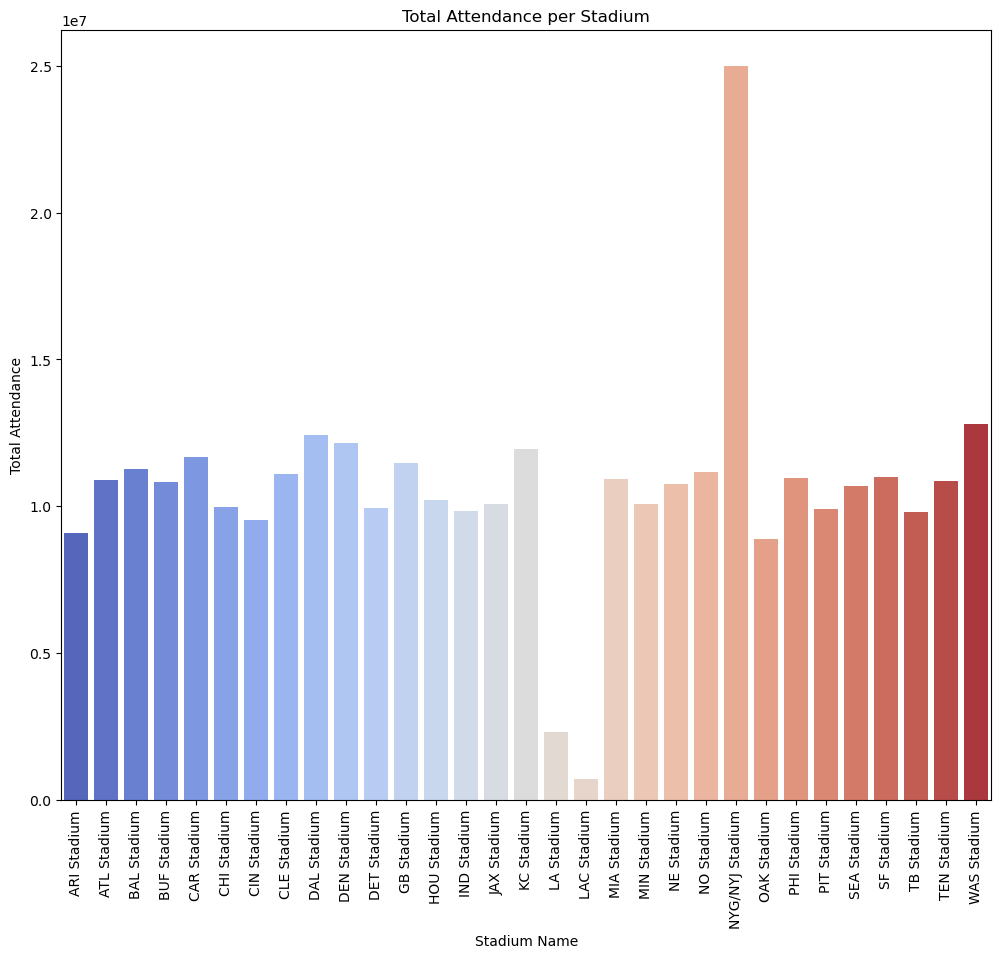

In [79]:
total_attendance_stadium = result.groupby('stadium_name')['weekly_attendance'].sum().reset_index(name='Total Attendance')

plt.figure(figsize=(12, 10))
sns.barplot(x='stadium_name', y='Total Attendance', data=total_attendance_stadium, palette='coolwarm')
plt.xlabel('Stadium Name')
plt.ylabel('Total Attendance')
plt.title('Total Attendance per Stadium')
plt.xticks(rotation=90)  
plt.show()

/var/folders/9w/dgxmbyyn2hl1p64rjgpmgw880000gn/T/ipykernel_48072/330812869.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



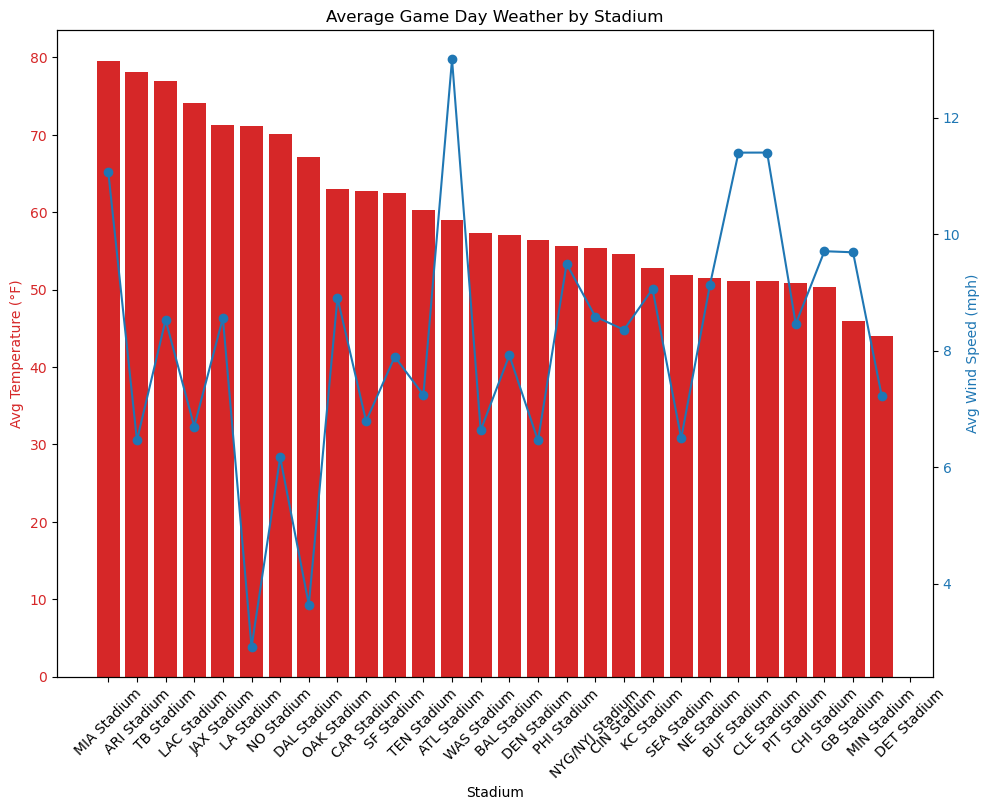

In [80]:
import seaborn as sns

stadium_weather = result.groupby('stadium_name').agg({
    'temp': 'mean',
    'wind': 'mean'
}).sort_values(by='temp', ascending=False)


fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:red'
ax1.set_xlabel('Stadium')
ax1.set_ylabel('Avg Temperature (°F)', color=color)
ax1.bar(stadium_weather.index, stadium_weather['temp'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(stadium_weather.index, rotation=45)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Avg Wind Speed (mph)', color=color)
ax2.plot(stadium_weather.index, stadium_weather['wind'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Average Game Day Weather by Stadium')
plt.show()

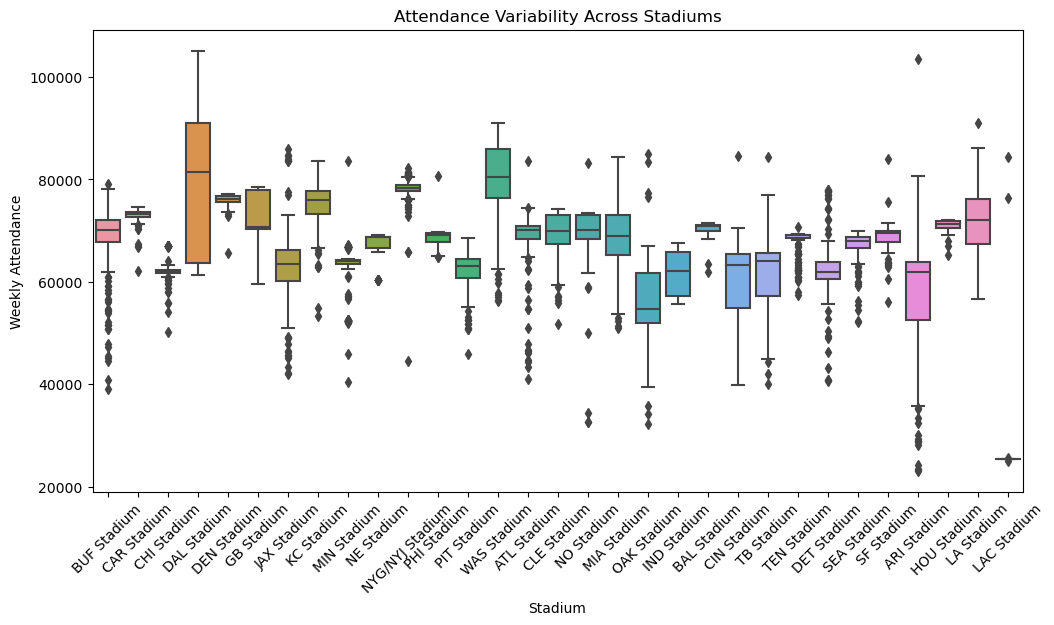

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=result, x='stadium_name', y='weekly_attendance')
plt.xticks(rotation=45)
plt.title('Attendance Variability Across Stadiums')
plt.xlabel('Stadium')
plt.ylabel('Weekly Attendance')
plt.show()

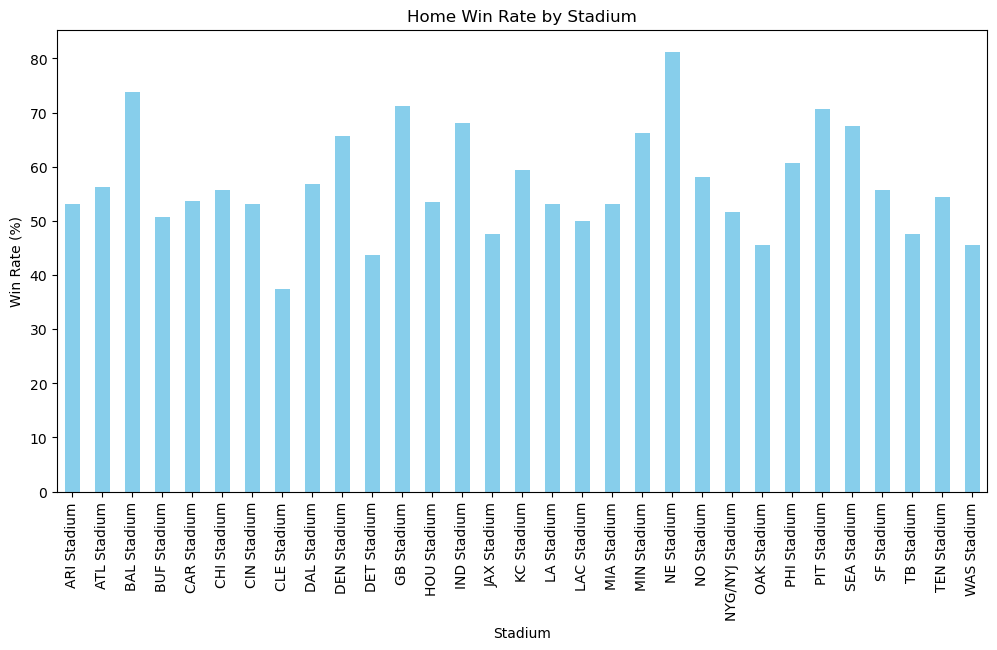

In [82]:
home_wins = result[result['home_team_win'] == 1].groupby('stadium_name').size()
home_games = result.groupby('stadium_name').size()
win_rates = home_wins / home_games * 100

win_rates.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Home Win Rate by Stadium')
plt.xlabel('Stadium')
plt.ylabel('Win Rate (%)')
plt.show()

In [83]:
reset_output()
output_notebook()

# Assuming 'result' DataFrame has 'weekly_attendance' and 'stadium_name'
stadiums = result['stadium_name'].unique()
palette = [Category20[20][i % 20] for i in range(len(stadiums))]

# Creating histogram data for each stadium
hist_data = {}
edges_data = {}
for i, stadium in enumerate(stadiums):
    hist, edges = np.histogram(result[result['stadium_name'] == stadium]['weekly_attendance'], bins=10)
    hist_data[stadium] = hist
    edges_data[stadium] = edges

# Creating a Bokeh figure
p = figure(title="Histogram of Weekly Attendance by Stadium", x_axis_label='Weekly Attendance', y_axis_label='Frequency',
           width=1300, height=1000, tools="pan,wheel_zoom,box_zoom,reset,save")

# Add quads for each histogram
for i, stadium in enumerate(stadiums):
    p.quad(top=hist_data[stadium], bottom=0, left=edges_data[stadium][:-1], right=edges_data[stadium][1:],
           fill_color=palette[i], line_color='white', alpha=0.8, legend_label=stadium,
           muted_color=palette[i], muted_alpha=0.1, muted=True)

# Configuring the interactive legend
p.legend.location = "top_right"
p.legend.orientation = "horizontal"
p.legend.click_policy = "mute"  # Allows users to click on legend items to hide/show histograms


show(p)

Loading BokehJS ...

<a id="teams"></a> <br>
### Teams

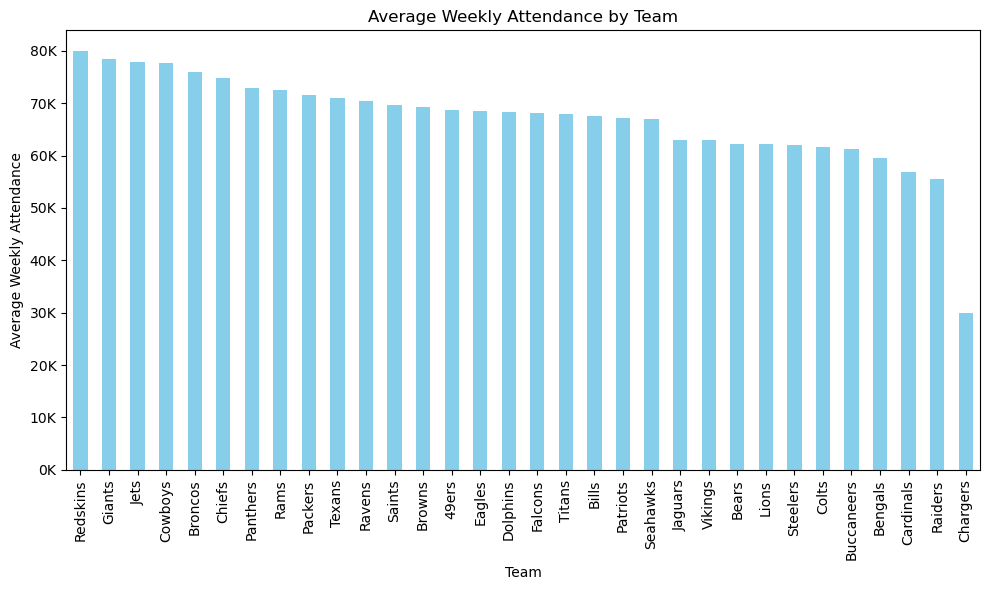

In [84]:
average_attendance = result.groupby('team_name')['weekly_attendance'].mean().sort_values(ascending=False)

# Generate the plot
plt.figure(figsize=(10, 6))
average_attendance.plot(kind='bar', color='skyblue')

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Calculate the maximum attendance (sum of weekly attendance for each team)
max_attendance = average_attendance.max()
max_tick = ((max_attendance + 10000) // 10000) * 10000

# Generate tick values at 10k intervals up to the maximum attendance
tick_values = range(0, int(max_tick) + 10000, 10000)
plt.yticks(tick_values, [f'{x/1000:.0f}K' for x in tick_values])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

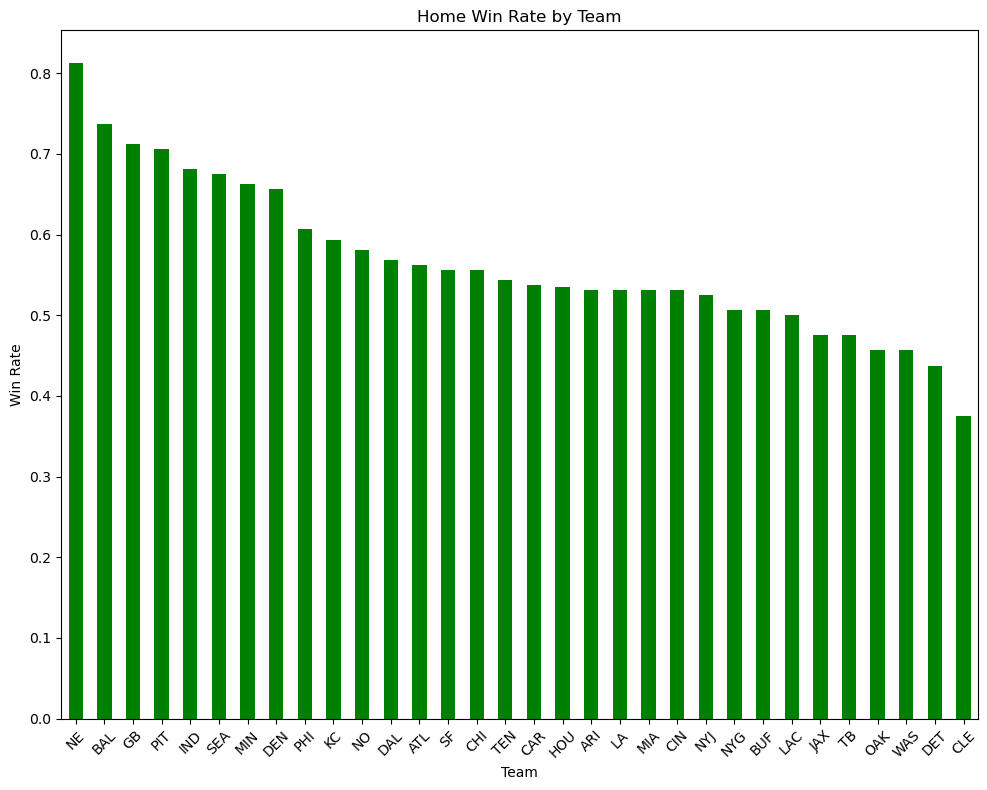

In [85]:
home_wins = result[result['home_team_win'] == 1].groupby('home_team').size()
total_home_games = result.groupby('home_team').size()
home_win_rate = (home_wins / total_home_games).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
home_win_rate.plot(kind='bar', color='green')
plt.title('Home Win Rate by Team')
plt.xlabel('Team')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
# Combine the first wins for home and away teams

home_first_win = result[result['home_score'] > result['away_score']].groupby('home_team')['gameday'].min()

# Find the earliest game where each team won as an away team
away_first_win = result[result['away_score'] > result['home_score']].groupby('away_team')['gameday'].min()

# Combine the first wins for home and away teams
first_wins = pd.concat([home_first_win, away_first_win]).groupby(level=0).min()
first_wins = pd.concat([home_first_win, away_first_win]).groupby(level=0).min().reset_index()
first_wins.columns = ['Team', 'First Win']

# Create an interactive scatter plot with Plotly
fig = px.scatter(first_wins, x='First Win', y='Team', hover_data={'First Win': '|%Y-%m-%d'}, color='Team')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.update_layout(title='First Win for Each Team', xaxis_title='Date of First Win', yaxis_title='Team')
fig.show()


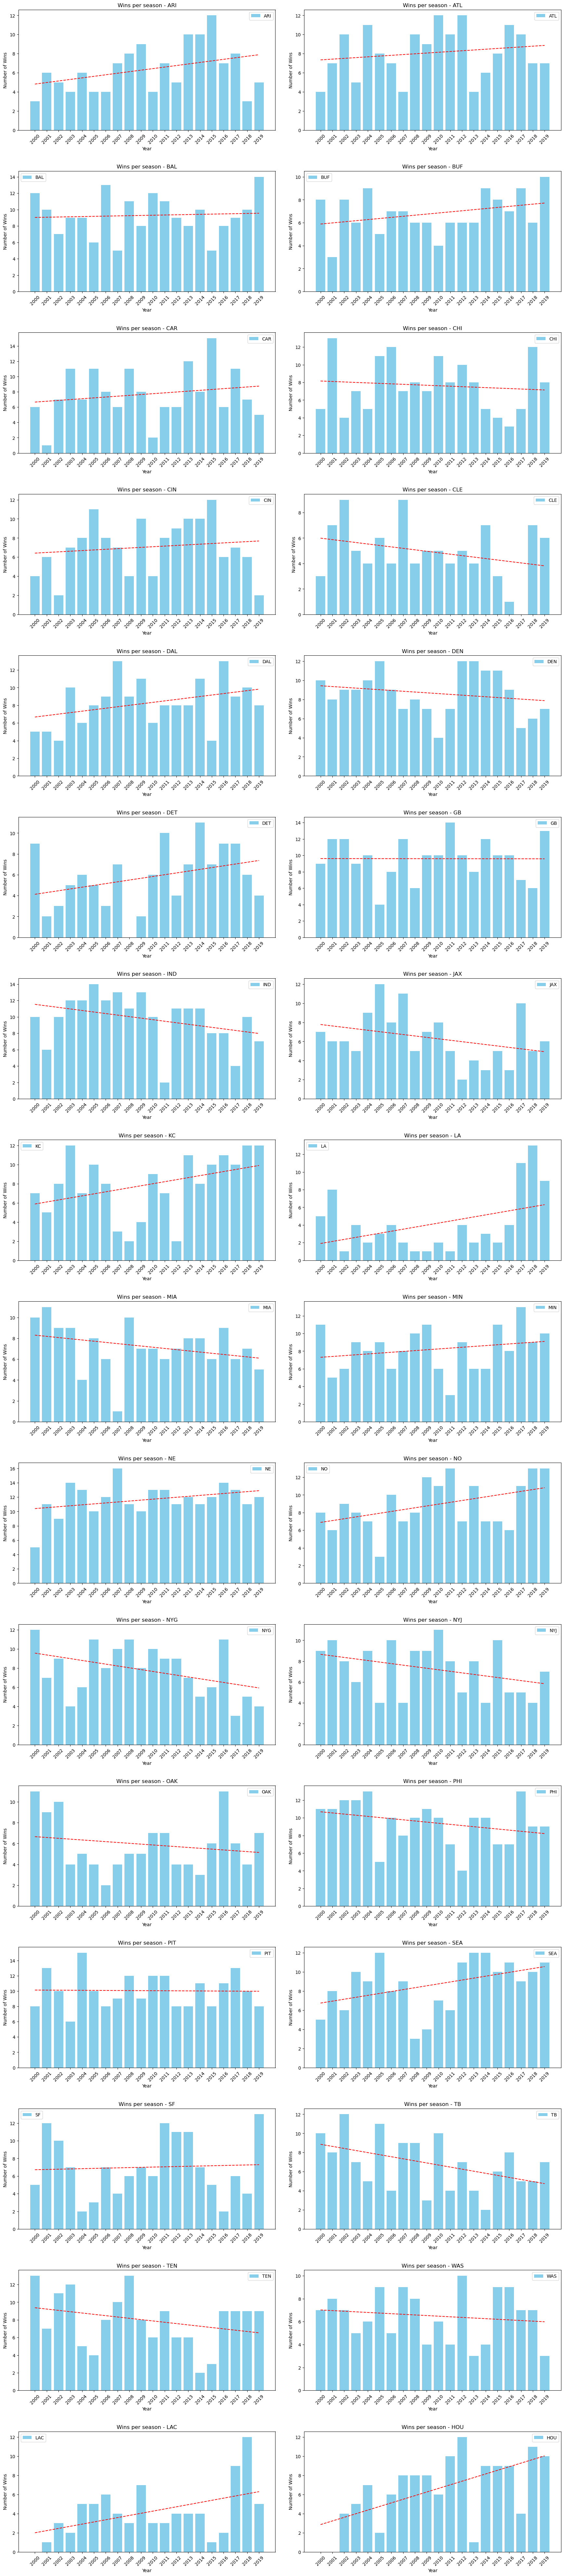

In [87]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Pivot the table to have teams as columns and years as rows
wins_pivot = wins_per_season.pivot(index='season', columns='winning_team', values='wins').fillna(0)

# Plot each team separately
teams = wins_per_season['winning_team'].unique()
num_teams = len(teams)
num_cols = 2  # Number of columns for subplots
num_rows = (num_teams + 1) // num_cols  # Calculate number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows))

for i, team in enumerate(teams):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]
    
    ax.bar(wins_pivot.index, wins_pivot[team], label=team, color='skyblue')
    ax.set_title(f'Wins per season - {team}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Wins')
    ax.legend()

    # Calculate trendline using linear regression
    x = np.array(wins_pivot.index).reshape(-1, 1)
    y = wins_pivot[team].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    trendline = model.predict(x)
    ax.plot(wins_pivot.index, trendline, color='red', linestyle='--', label='Trendline')

    ax.set_xticks(wins_pivot.index)
    ax.set_xticklabels(wins_pivot.index, rotation=45)

    # Set y-ticks to display only even numbers
    y_ticks = np.arange(0, max(wins_pivot[team]) + 1, 2)
    ax.set_yticks(y_ticks)

plt.tight_layout(pad=3.0)  # Increase padding between subplots
plt.show()

In [88]:
output_notebook()
reset_output()
source2 = ColumnDataSource(wins_pivot.reset_index())

num_teams = len(teams)
palette = [Category20[20][i % 20] for i in range(num_teams)]

# Create a new figure
pp = figure(title="Wins per Season by Team", x_axis_label='Season', y_axis_label='Number of Wins',
           tools="pan,wheel_zoom,box_zoom,reset,save", width=1300, height=1000)

bars = {}
for i, team in enumerate(teams):
    bars[team]=pp.vbar(x='season', top=team, width=0.4, source=source2, 
            legend_label=team, color=palette[i],
            muted_color=palette[i], muted_alpha=0.04,muted=True,alpha=0.8)


# Configure legend
pp.legend.location = "top_left"
pp.legend.click_policy = "mute"  # Allows users to click on legend items to hide/show lines

pp.legend.location = "top_right"
pp.legend.orientation = "horizontal"
pp.legend.border_line_color = None
show(pp)

Loading BokehJS ...

/var/folders/9w/dgxmbyyn2hl1p64rjgpmgw880000gn/T/ipykernel_48072/3722935137.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator



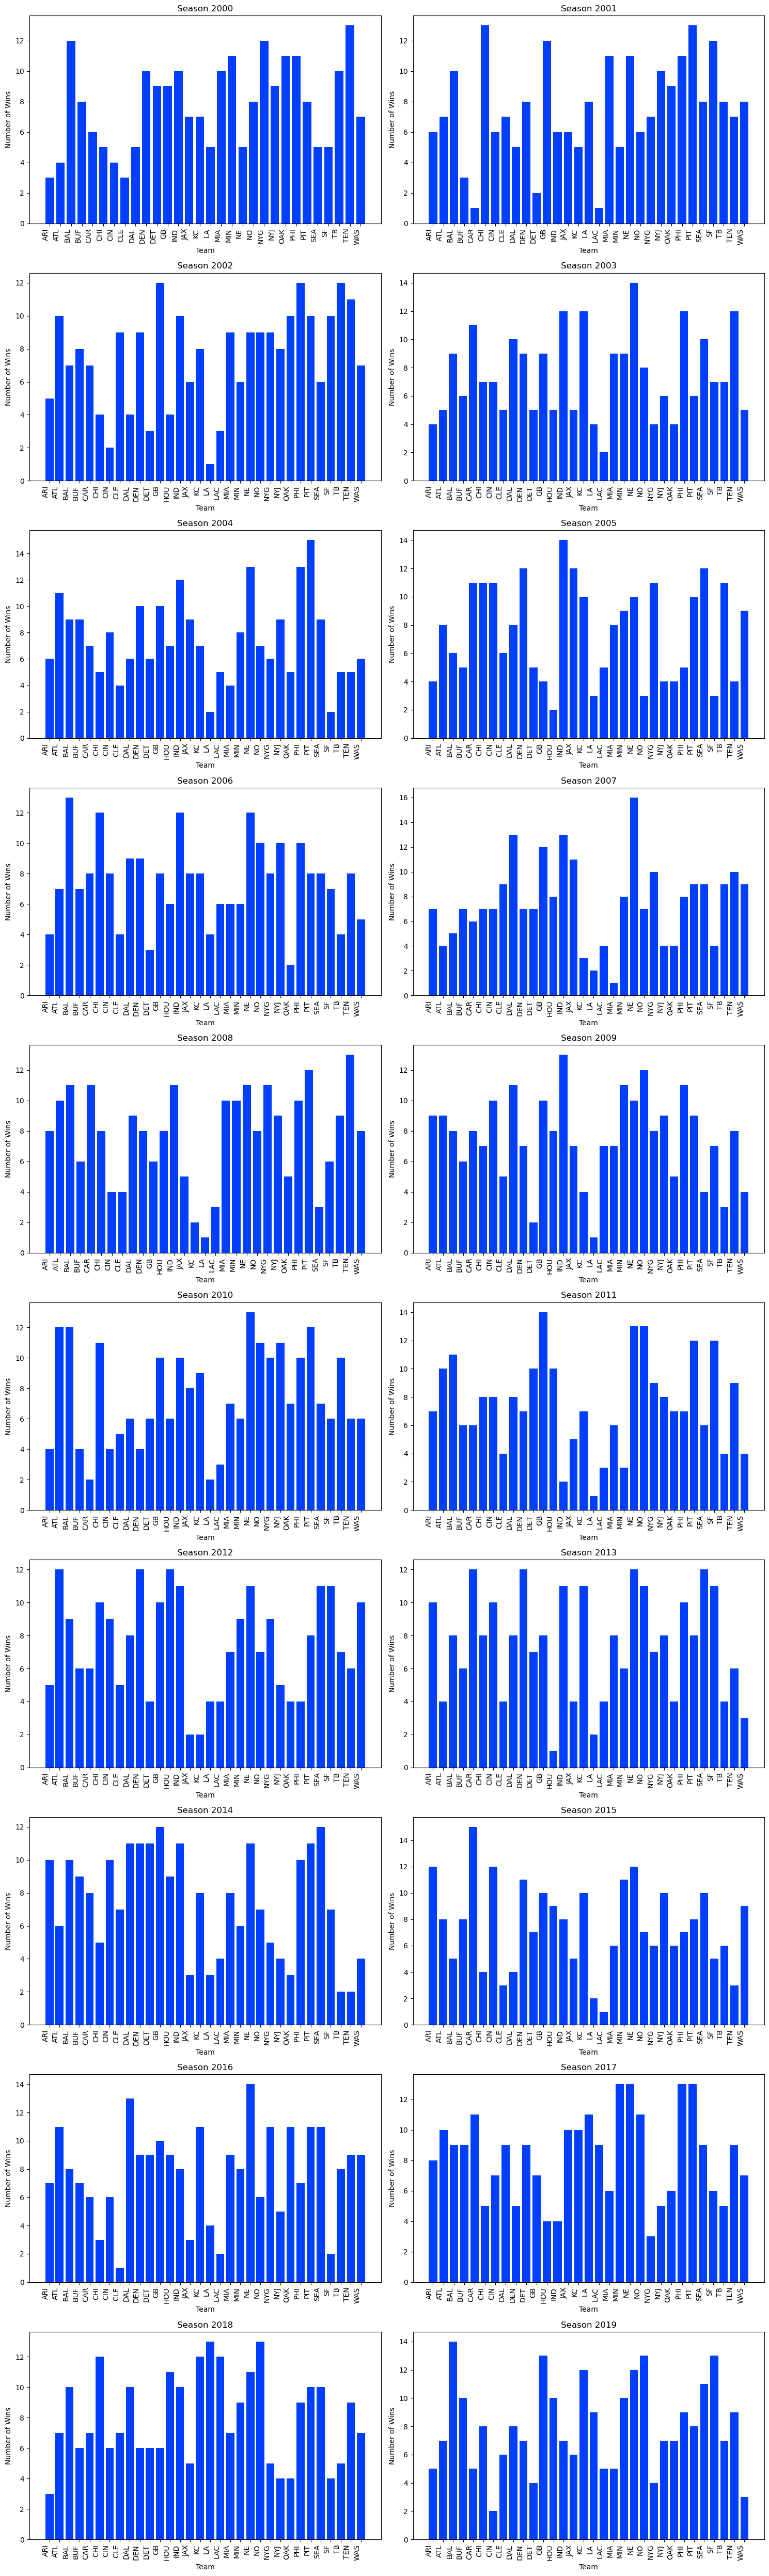

In [89]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Get unique seasons
seasons = wins_per_season['season'].unique()

# Calculate the number of rows needed for subplots
num_rows = len(seasons) // 2 + (len(seasons) % 2 > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Iterate through each season and create a graph
for idx, season in enumerate(seasons):
    season_data = wins_per_season[wins_per_season['season'] == season]
    ax = axes[idx // 2, idx % 2]
    ax.bar(season_data['winning_team'], season_data['wins'])
    ax.set_title(f'Season {int(season)}')
    ax.set_xlabel('Team')
    ax.set_ylabel('Number of Wins')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(season_data['winning_team'], rotation=90, ha='right')
    plt.tight_layout()

# Hide empty subplots
if len(seasons) % 2 != 0:
    for i in range(len(seasons) % 2, 2):
        fig.delaxes(axes[num_rows - 1, i])

plt.show()


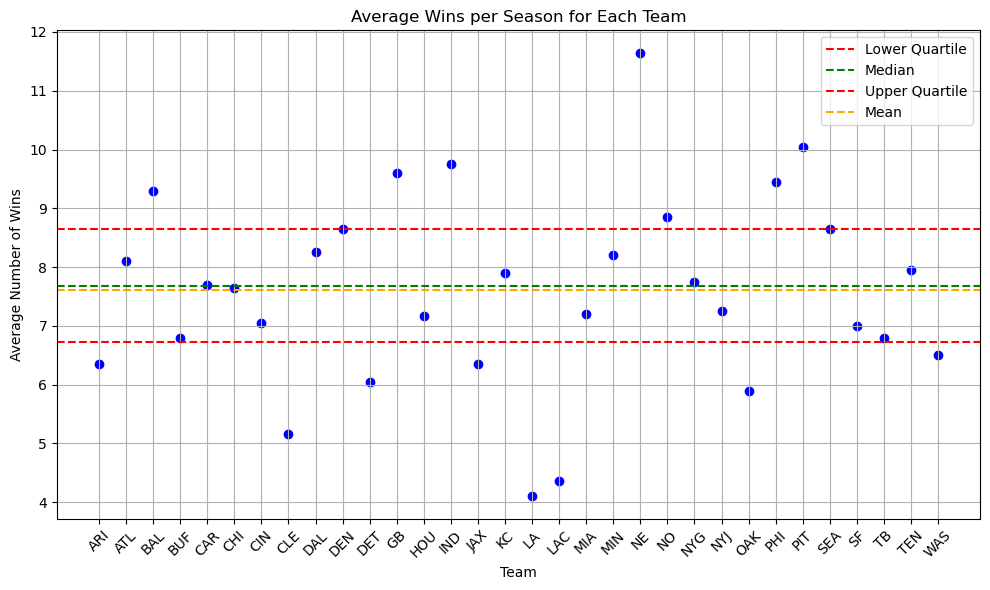

In [90]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Group by season and team and count the number of wins
wins_per_season = result.groupby(['season', 'winning_team']).size().reset_index(name='wins')

# Calculate the average number of wins per season for each team
average_wins_per_team = wins_per_season.groupby('winning_team')['wins'].mean().reset_index()

# Calculate quartiles and median
lower_quartile = np.percentile(average_wins_per_team['wins'], 25)
median = np.percentile(average_wins_per_team['wins'], 50)
upper_quartile = np.percentile(average_wins_per_team['wins'], 75)
mean = average_wins_per_team['wins'].mean()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_wins_per_team['winning_team'], average_wins_per_team['wins'], color='blue')
plt.title('Average Wins per Season for Each Team')
plt.xlabel('Team')
plt.ylabel('Average Number of Wins')
plt.xticks(rotation=45)
plt.grid(True)

# Add quartiles and mean lines
plt.axhline(y=lower_quartile, color='r', linestyle='--', label='Lower Quartile')
plt.axhline(y=median, color='g', linestyle='--', label='Median')
plt.axhline(y=upper_quartile, color='r', linestyle='--', label='Upper Quartile')
plt.axhline(y=mean, color='orange', linestyle='--', label='Mean')

plt.legend()
plt.tight_layout()
plt.show()

<a id="genre"></a> <br>
# Genre

Genre. Which genre of data story did you use?

* For this project, we decided to choose the magazine style as our presentation genre for the storytelling and data visualization. There are several factors that play into this decision. Firstly, we believe that the magazine style provides readers with efficiency when reading our project, as well as visually appealing images. The magazine style genre offers opportunities to present complex and diverse visualizations in a simpler way, which influences audience engagement and clarity. 

Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

* We used the following tools from the categories of Visual Narrative:
    * Visual Structuring: 
    * Highlighting:
    * Transition Guidance: 


Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

* We used the following tools from the categories of Narratuve Structure:
    * Ordering: 
    * Interactivity:
    * Messaging: 
    